In [22]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import umap.umap_ as umap

In [2]:
df = pd.read_csv("winequality-red.csv")
y_quality = df["quality"]

In [3]:
df.drop('quality',axis=1,inplace=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [4]:
x_redwine = df.copy()
x_redwine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [6]:
#normalize data before applying PCA
scaler = StandardScaler()
x_standardized_redwine = x_redwine.copy()
x_standardized_redwine[["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides",
                        "free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]]=scaler.fit_transform(x_redwine[["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides",
                        "free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]])
#x_standardized_redwine.drop("quality",axis=1,inplace=True)
x_standardized_redwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


Text(0, 0.5, 'pc2')

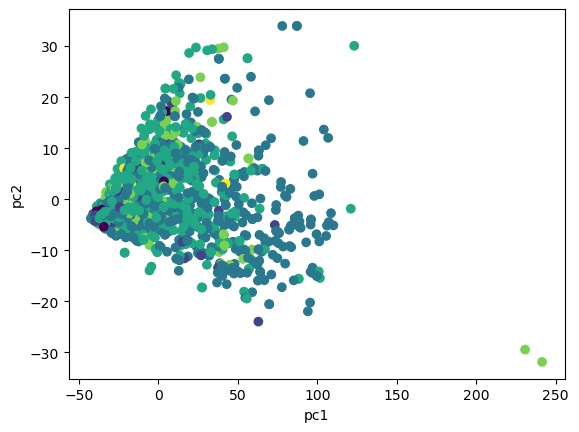

In [7]:
#apply pca (without standardization)
pca = PCA(n_components=2)
x_redwine_pca = pca.fit_transform(x_redwine)
plt.scatter(x_redwine_pca[:,0],x_redwine_pca[:,1],c=y_quality)
plt.xlabel('pc1')
plt.ylabel('pc2')

Text(0, 0.5, 'pc2')

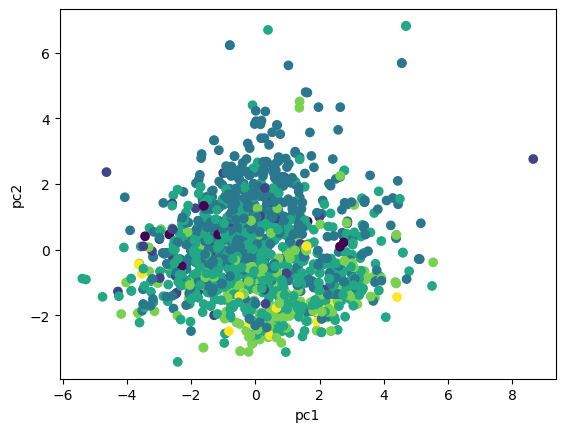

In [8]:
#apply pca with standardization
pca = PCA(n_components=2)
x_redwine_pca_standard = pca.fit_transform(x_standardized_redwine)
plt.scatter(x_redwine_pca_standard[:,0],x_redwine_pca_standard[:,1],c=y_quality)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title("PCA with standardization")

Text(0.5, 1.0, 'T-SNE with Standardization')

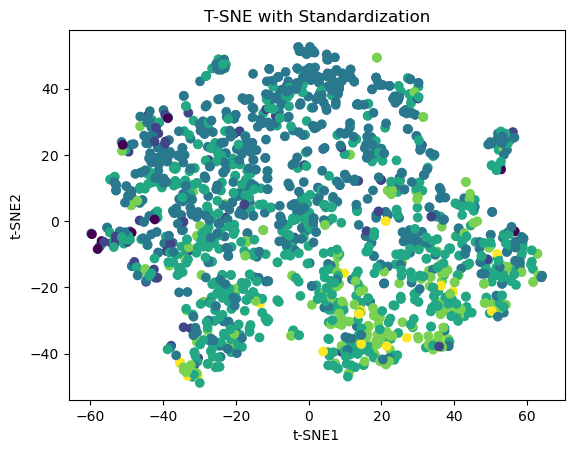

In [14]:
#TSNE
tsne = TSNE(n_components = 2, random_state=50)
x_tsne_standardized = tsne.fit_transform(x_standardized_redwine)
plt.scatter(x_tsne_standardized[:,0],x_tsne_standardized[:,1], c=y_quality)
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.title("T-SNE with Standardization")

C:\Users\arjun\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


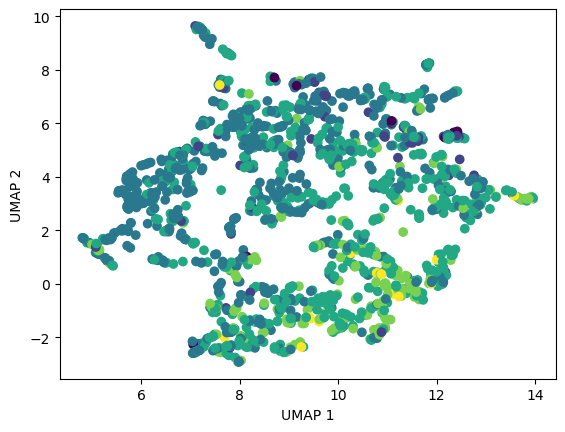

In [24]:
#UMAP
x_umap = umap.UMAP(n_components=2,random_state=50).fit_transform(x_standardized_redwine)
#x_umap_standardized = x_umap.fit_transform(x_standardized_redwine)
plt.scatter(x_umap[:,0],x_umap[:,1],c=y_quality)
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()